In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
])
test = torchvision.datasets.MNIST(root='./data', train=False, download=True,  transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 25987174.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 35691129.59it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 11474487.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7375349.89it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
ds_test = torch.utils.data.DataLoader(test, batch_size=64)

In [6]:
from torch import nn
import torch.nn.functional as F

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1000),
            nn.ReLU(),
            nn.Linear(1000, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1000),
            nn.ReLU(),
            nn.Linear(1000, 28*28),
            nn.Sigmoid()
        )

    def forward(self, flat):
        return self.model(flat)

class AutoencoderBig(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 28*28),
            nn.Sigmoid()
        )

    def forward(self, flat):
        return self.model(flat)

# model = Autoencoder()

In [15]:
@torch.no_grad()
def valid_loss(model, ds_test, loss_fn, device="cpu"):
    summed_loss = 0
    iters = 0
    for batch in ds_test:
        image_tensor = batch[0]
        B, C, H, W = image_tensor.shape
        inputs = image_tensor.view(B, -1)
        inputs = inputs.to(device)
        inputs = inputs.to(torch.float32)
        inputs /= 255.0

        # 1. forward pass
        outputs = model(inputs)

        # 2. update weights
        loss = loss_fn(outputs, inputs)
        summed_loss += loss.detach().cpu().item()
        iters +=1
    return summed_loss / iters


def _train(model, ds, device="cpu", iterations=None, epochs=1000):
    device = "cuda"
    loss_fn = nn.MSELoss()
    optim = torch.optim.AdamW(model.parameters())
    model.to(device)
    model.train()
    losses = []
    iteration = 0

    for epoch in range(epochs):
        for i, batch in enumerate(ds):
            if iterations is not None and iteration > iterations:
                break

            # 0. process data
            image_tensor = batch[0]
            B, C, H, W = image_tensor.shape
            inputs = image_tensor.view(B, -1) # flatten, but not batches
            inputs = inputs.to(device)
            inputs = inputs.to(torch.float32)
            inputs /= 255.0

            # 1. forward pass
            outputs = model(inputs)

            # 2. update weights
            loss = loss_fn(outputs, inputs)
            optim.zero_grad()
            loss.backward()
            optim.step()

            # 3. log out the losses
            losses.append((iteration, loss.detach().cpu().item()))
            iteration +=1
        valid = valid_loss(model, ds_test, loss_fn, device)
        print(epoch, "train", losses[-1][1], "validation", valid)

    return losses

In [47]:
def tensor_to_image(image):
    image *= 255
    image = image.to(torch.uint8)
    return Image.fromarray(image.detach().cpu().numpy()).resize((256, 256))

def check(model, image_tensor, device="cpu"):
    C, H, W = image_tensor.shape
    B = 1
    inputs = image_tensor.view(B, -1) # flatten, but not batches
    inputs = inputs.to(device)
    inputs = inputs.to(torch.float32)
    inputs /= 255.0

    outputs = model(inputs)
    print((outputs.view(H, W) > 0.5).to(torch.uint8).sum())
    return tensor_to_image(outputs.view(H, W))

In [48]:
big = False
if big:
    model = AutoencoderBig()
    model.load_state_dict(torch.load("models/ae-big.pth", map_location="cpu"))
else:
    model = Autoencoder()
    model.load_state_dict(torch.load("models/ae-1.pth", map_location="cpu"))

tensor(70)


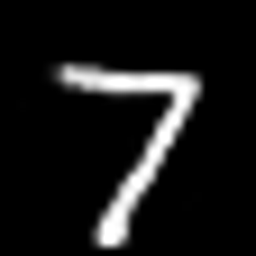

In [49]:
first = test[0][0]
check(model, first)

In [50]:
def eight_image():

    obj = {
        "0": 0,
        "1": 0,
        "2": 0,
        "3": 0,
        "4": 0,
        "5": 0,
        "6": 0,
        "7": 0,
        "8": 0,
        "9": 0,
        "10": 0,
        "11": 0,
        "12": 0,
        "13": 0,
        "14": 0,
        "15": 0,
        "16": 0,
        "17": 0,
        "18": 0,
        "19": 0,
        "20": 0,
        "21": 0,
        "22": 0,
        "23": 0,
        "24": 0,
        "25": 0,
        "26": 0,
        "27": 0,
        "28": 0,
        "29": 0,
        "30": 0,
        "31": 0,
        "32": 0,
        "33": 0,
        "34": 0,
        "35": 0,
        "36": 0,
        "37": 0,
        "38": 0,
        "39": 0,
        "40": 0,
        "41": 0,
        "42": 0,
        "43": 0,
        "44": 0,
        "45": 0,
        "46": 0,
        "47": 0,
        "48": 0,
        "49": 0,
        "50": 0,
        "51": 0,
        "52": 0,
        "53": 0,
        "54": 0,
        "55": 0,
        "56": 0,
        "57": 0,
        "58": 0,
        "59": 0,
        "60": 0,
        "61": 0,
        "62": 0,
        "63": 0,
        "64": 0,
        "65": 0,
        "66": 0,
        "67": 0,
        "68": 0,
        "69": 0,
        "70": 0,
        "71": 0,
        "72": 0,
        "73": 0,
        "74": 0,
        "75": 0,
        "76": 0,
        "77": 0,
        "78": 0,
        "79": 0,
        "80": 0,
        "81": 0,
        "82": 0,
        "83": 0,
        "84": 0,
        "85": 0,
        "86": 0,
        "87": 0,
        "88": 0,
        "89": 0,
        "90": 0,
        "91": 0,
        "92": 0,
        "93": 0,
        "94": 0,
        "95": 0,
        "96": 0,
        "97": 0,
        "98": 0,
        "99": 0,
        "100": 0,
        "101": 0,
        "102": 0,
        "103": 0,
        "104": 0,
        "105": 0,
        "106": 0,
        "107": 0,
        "108": 0,
        "109": 0,
        "110": 0,
        "111": 0,
        "112": 0,
        "113": 0,
        "114": 0,
        "115": 0,
        "116": 0,
        "117": 0,
        "118": 0,
        "119": 0,
        "120": 0,
        "121": 0,
        "122": 0,
        "123": 0,
        "124": 0,
        "125": 0,
        "126": 0,
        "127": 0,
        "128": 0,
        "129": 0,
        "130": 0,
        "131": 0,
        "132": 0,
        "133": 0,
        "134": 0,
        "135": 0,
        "136": 0,
        "137": 0,
        "138": 0,
        "139": 0,
        "140": 0,
        "141": 0,
        "142": 0,
        "143": 0,
        "144": 0,
        "145": 0,
        "146": 0,
        "147": 0,
        "148": 0,
        "149": 0,
        "150": 0,
        "151": 0,
        "152": 0,
        "153": 0,
        "154": 0,
        "155": 0,
        "156": 0,
        "157": 0,
        "158": 0,
        "159": 0,
        "160": 0,
        "161": 0,
        "162": 0,
        "163": 0,
        "164": 0,
        "165": 0,
        "166": 0,
        "167": 0,
        "168": 0,
        "169": 0,
        "170": 0,
        "171": 0,
        "172": 0,
        "173": 0,
        "174": 0,
        "175": 0,
        "176": 0,
        "177": 0,
        "178": 0,
        "179": 0,
        "180": 0,
        "181": 0,
        "182": 0,
        "183": 0,
        "184": 0,
        "185": 0,
        "186": 0,
        "187": 0,
        "188": 0,
        "189": 0,
        "190": 0,
        "191": 0,
        "192": 0,
        "193": 0,
        "194": 0,
        "195": 0,
        "196": 0,
        "197": 0,
        "198": 0,
        "199": 0,
        "200": 0,
        "201": 0,
        "202": 0,
        "203": 0,
        "204": 0,
        "205": 0,
        "206": 0,
        "207": 0,
        "208": 0,
        "209": 0,
        "210": 0,
        "211": 0,
        "212": 0,
        "213": 0,
        "214": 0,
        "215": 0,
        "216": 0,
        "217": 0,
        "218": 0,
        "219": 0,
        "220": 0,
        "221": 0,
        "222": 0,
        "223": 0,
        "224": 0,
        "225": 0,
        "226": 0,
        "227": 0,
        "228": 0,
        "229": 0,
        "230": 0,
        "231": 0,
        "232": 0,
        "233": 0,
        "234": 0,
        "235": 0,
        "236": 1,
        "237": 1,
        "238": 1,
        "239": 1,
        "240": 0,
        "241": 0,
        "242": 0,
        "243": 0,
        "244": 0,
        "245": 0,
        "246": 0,
        "247": 0,
        "248": 0,
        "249": 0,
        "250": 0,
        "251": 0,
        "252": 0,
        "253": 0,
        "254": 0,
        "255": 0,
        "256": 0,
        "257": 0,
        "258": 0,
        "259": 0,
        "260": 0,
        "261": 0,
        "262": 0,
        "263": 1,
        "264": 1,
        "265": 0,
        "266": 0,
        "267": 1,
        "268": 1,
        "269": 0,
        "270": 0,
        "271": 0,
        "272": 0,
        "273": 0,
        "274": 0,
        "275": 0,
        "276": 0,
        "277": 0,
        "278": 0,
        "279": 0,
        "280": 0,
        "281": 0,
        "282": 0,
        "283": 0,
        "284": 0,
        "285": 0,
        "286": 0,
        "287": 0,
        "288": 0,
        "289": 0,
        "290": 0,
        "291": 1,
        "292": 0,
        "293": 0,
        "294": 0,
        "295": 0,
        "296": 1,
        "297": 1,
        "298": 0,
        "299": 0,
        "300": 0,
        "301": 0,
        "302": 0,
        "303": 0,
        "304": 0,
        "305": 0,
        "306": 0,
        "307": 0,
        "308": 0,
        "309": 0,
        "310": 0,
        "311": 0,
        "312": 0,
        "313": 0,
        "314": 0,
        "315": 0,
        "316": 0,
        "317": 0,
        "318": 0,
        "319": 1,
        "320": 0,
        "321": 0,
        "322": 0,
        "323": 0,
        "324": 0,
        "325": 1,
        "326": 1,
        "327": 0,
        "328": 0,
        "329": 0,
        "330": 0,
        "331": 0,
        "332": 0,
        "333": 0,
        "334": 0,
        "335": 0,
        "336": 0,
        "337": 0,
        "338": 0,
        "339": 0,
        "340": 0,
        "341": 0,
        "342": 0,
        "343": 0,
        "344": 0,
        "345": 0,
        "346": 0,
        "347": 1,
        "348": 0,
        "349": 0,
        "350": 0,
        "351": 0,
        "352": 0,
        "353": 0,
        "354": 1,
        "355": 0,
        "356": 0,
        "357": 0,
        "358": 0,
        "359": 0,
        "360": 0,
        "361": 0,
        "362": 0,
        "363": 0,
        "364": 0,
        "365": 0,
        "366": 0,
        "367": 0,
        "368": 0,
        "369": 0,
        "370": 0,
        "371": 0,
        "372": 0,
        "373": 0,
        "374": 0,
        "375": 1,
        "376": 1,
        "377": 1,
        "378": 0,
        "379": 0,
        "380": 0,
        "381": 0,
        "382": 1,
        "383": 0,
        "384": 0,
        "385": 0,
        "386": 0,
        "387": 0,
        "388": 0,
        "389": 0,
        "390": 0,
        "391": 0,
        "392": 0,
        "393": 0,
        "394": 0,
        "395": 0,
        "396": 0,
        "397": 0,
        "398": 0,
        "399": 0,
        "400": 0,
        "401": 0,
        "402": 0,
        "403": 0,
        "404": 0,
        "405": 1,
        "406": 1,
        "407": 1,
        "408": 0,
        "409": 1,
        "410": 1,
        "411": 0,
        "412": 0,
        "413": 0,
        "414": 0,
        "415": 0,
        "416": 0,
        "417": 0,
        "418": 0,
        "419": 0,
        "420": 0,
        "421": 0,
        "422": 0,
        "423": 0,
        "424": 0,
        "425": 0,
        "426": 0,
        "427": 0,
        "428": 0,
        "429": 0,
        "430": 0,
        "431": 0,
        "432": 0,
        "433": 0,
        "434": 0,
        "435": 1,
        "436": 1,
        "437": 1,
        "438": 0,
        "439": 0,
        "440": 0,
        "441": 0,
        "442": 0,
        "443": 0,
        "444": 0,
        "445": 0,
        "446": 0,
        "447": 0,
        "448": 0,
        "449": 0,
        "450": 0,
        "451": 0,
        "452": 0,
        "453": 0,
        "454": 0,
        "455": 0,
        "456": 0,
        "457": 0,
        "458": 0,
        "459": 0,
        "460": 0,
        "461": 0,
        "462": 1,
        "463": 1,
        "464": 1,
        "465": 0,
        "466": 0,
        "467": 0,
        "468": 0,
        "469": 0,
        "470": 0,
        "471": 0,
        "472": 0,
        "473": 0,
        "474": 0,
        "475": 0,
        "476": 0,
        "477": 0,
        "478": 0,
        "479": 0,
        "480": 0,
        "481": 0,
        "482": 0,
        "483": 0,
        "484": 0,
        "485": 1,
        "486": 1,
        "487": 1,
        "488": 1,
        "489": 1,
        "490": 0,
        "491": 0,
        "492": 0,
        "493": 1,
        "494": 0,
        "495": 0,
        "496": 0,
        "497": 0,
        "498": 0,
        "499": 0,
        "500": 0,
        "501": 0,
        "502": 0,
        "503": 0,
        "504": 0,
        "505": 0,
        "506": 0,
        "507": 0,
        "508": 0,
        "509": 0,
        "510": 0,
        "511": 1,
        "512": 1,
        "513": 0,
        "514": 0,
        "515": 0,
        "516": 0,
        "517": 0,
        "518": 0,
        "519": 0,
        "520": 0,
        "521": 1,
        "522": 1,
        "523": 0,
        "524": 0,
        "525": 0,
        "526": 0,
        "527": 0,
        "528": 0,
        "529": 0,
        "530": 0,
        "531": 0,
        "532": 0,
        "533": 0,
        "534": 0,
        "535": 0,
        "536": 0,
        "537": 0,
        "538": 0,
        "539": 1,
        "540": 0,
        "541": 0,
        "542": 0,
        "543": 0,
        "544": 0,
        "545": 0,
        "546": 0,
        "547": 0,
        "548": 0,
        "549": 0,
        "550": 1,
        "551": 0,
        "552": 0,
        "553": 0,
        "554": 0,
        "555": 0,
        "556": 0,
        "557": 0,
        "558": 0,
        "559": 0,
        "560": 0,
        "561": 0,
        "562": 0,
        "563": 0,
        "564": 0,
        "565": 0,
        "566": 0,
        "567": 1,
        "568": 0,
        "569": 0,
        "570": 0,
        "571": 0,
        "572": 0,
        "573": 0,
        "574": 0,
        "575": 0,
        "576": 0,
        "577": 0,
        "578": 1,
        "579": 0,
        "580": 0,
        "581": 0,
        "582": 0,
        "583": 0,
        "584": 0,
        "585": 0,
        "586": 0,
        "587": 0,
        "588": 0,
        "589": 0,
        "590": 0,
        "591": 0,
        "592": 0,
        "593": 0,
        "594": 0,
        "595": 1,
        "596": 1,
        "597": 1,
        "598": 0,
        "599": 0,
        "600": 0,
        "601": 0,
        "602": 0,
        "603": 0,
        "604": 0,
        "605": 1,
        "606": 1,
        "607": 0,
        "608": 0,
        "609": 0,
        "610": 0,
        "611": 0,
        "612": 0,
        "613": 0,
        "614": 0,
        "615": 0,
        "616": 0,
        "617": 0,
        "618": 0,
        "619": 0,
        "620": 0,
        "621": 0,
        "622": 0,
        "623": 0,
        "624": 0,
        "625": 1,
        "626": 1,
        "627": 1,
        "628": 1,
        "629": 0,
        "630": 0,
        "631": 0,
        "632": 1,
        "633": 1,
        "634": 0,
        "635": 0,
        "636": 0,
        "637": 0,
        "638": 0,
        "639": 0,
        "640": 0,
        "641": 0,
        "642": 0,
        "643": 0,
        "644": 0,
        "645": 0,
        "646": 0,
        "647": 0,
        "648": 0,
        "649": 0,
        "650": 0,
        "651": 0,
        "652": 0,
        "653": 0,
        "654": 0,
        "655": 0,
        "656": 1,
        "657": 1,
        "658": 1,
        "659": 1,
        "660": 0,
        "661": 0,
        "662": 0,
        "663": 0,
        "664": 0,
        "665": 0,
        "666": 0,
        "667": 0,
        "668": 0,
        "669": 0,
        "670": 0,
        "671": 0,
        "672": 0,
        "673": 0,
        "674": 0,
        "675": 0,
        "676": 0,
        "677": 0,
        "678": 0,
        "679": 0,
        "680": 0,
        "681": 0,
        "682": 0,
        "683": 0,
        "684": 0,
        "685": 0,
        "686": 0,
        "687": 0,
        "688": 0,
        "689": 0,
        "690": 0,
        "691": 0,
        "692": 0,
        "693": 0,
        "694": 0,
        "695": 0,
        "696": 0,
        "697": 0,
        "698": 0,
        "699": 0,
        "700": 0,
        "701": 0,
        "702": 0,
        "703": 0,
        "704": 0,
        "705": 0,
        "706": 0,
        "707": 0,
        "708": 0,
        "709": 0,
        "710": 0,
        "711": 0,
        "712": 0,
        "713": 0,
        "714": 0,
        "715": 0,
        "716": 0,
        "717": 0,
        "718": 0,
        "719": 0,
        "720": 0,
        "721": 0,
        "722": 0,
        "723": 0,
        "724": 0,
        "725": 0,
        "726": 0,
        "727": 0,
        "728": 0,
        "729": 0,
        "730": 0,
        "731": 0,
        "732": 0,
        "733": 0,
        "734": 0,
        "735": 0,
        "736": 0,
        "737": 0,
        "738": 0,
        "739": 0,
        "740": 0,
        "741": 0,
        "742": 0,
        "743": 0,
        "744": 0,
        "745": 0,
        "746": 0,
        "747": 0,
        "748": 0,
        "749": 0,
        "750": 0,
        "751": 0,
        "752": 0,
        "753": 0,
        "754": 0,
        "755": 0,
        "756": 0,
        "757": 0,
        "758": 0,
        "759": 0,
        "760": 0,
        "761": 0,
        "762": 0,
        "763": 0,
        "764": 0,
        "765": 0,
        "766": 0,
        "767": 0,
        "768": 0,
        "769": 0,
        "770": 0,
        "771": 0,
        "772": 0,
        "773": 0,
        "774": 0,
        "775": 0,
        "776": 0,
        "777": 0,
        "778": 0,
        "779": 0,
        "780": 0,
        "781": 0,
        "782": 0,
        "783": 0
    }
    return [obj[str(i)] for i in range(784)]

In [51]:
input = (torch.tensor([eight_image()])*255).to(torch.uint8)

tensor(56)


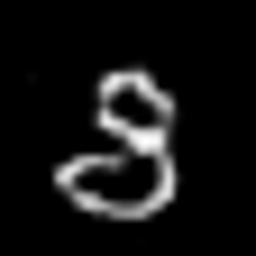

In [52]:
check(model, input.reshape(1, 28, 28))

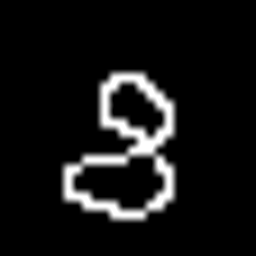

In [53]:
Image.fromarray(input.reshape(28, 28).numpy()).resize((256, 256))